Data Loading and Pre-Processing

In [8]:
import pandas as pd

# Load the datasets
products_march_df = pd.read_csv('Products March.csv')
product_mix_df = pd.read_csv('Product_mix.csv')
discount_df = pd.read_csv('Discount.csv')

# 1. Data Preprocessing and Cleaning for `products_march_df`
# This file seems to contain just product codes, so no preprocessing is necessary other than ensuring it's clean.
# Renaming the column to something more descriptive
products_march_df.columns = ['Product_Code']

# 2. Data Preprocessing and Cleaning for `product_mix_df`
# Check for missing values
print("Missing values in product_mix_df before cleaning:")
print(product_mix_df.isnull().sum())

# Fill missing values in categorical columns with the mode (most frequent value)
product_mix_df['Brand'].fillna(product_mix_df['Brand'].mode()[0], inplace=True)
product_mix_df['Brand group'].fillna(product_mix_df['Brand group'].mode()[0], inplace=True)
product_mix_df['Meal detail'].fillna(product_mix_df['Meal detail'].mode()[0], inplace=True)

# Fill missing values in numerical columns with 0
product_mix_df['Net Sales (TDA)'].fillna(0, inplace=True)
product_mix_df['Units Sold (TDA)'].fillna(0, inplace=True)

# Create a new cleaned DataFrame
cleaned_product_mix_df = product_mix_df.copy()

# 3. Data Preprocessing and Cleaning for `discount_df`
# Check for missing values
print("Missing values in discount_df before cleaning:")
print(discount_df.isnull().sum())

# Fill missing values in 'Discount (TDA)' with 0
discount_df['Discount (TDA)'].fillna(0, inplace=True)

# Fill missing values in categorical columns with the mode
for column in ['Local POS Area', 'Sold Menu Item']:
    discount_df[column].fillna(discount_df[column].mode()[0], inplace=True)

# Create a new cleaned DataFrame
cleaned_discount_df = discount_df.copy()

# After cleaning, let's take another look at the missing values to confirm
print("Missing values in cleaned_product_mix_df after cleaning:")
print(cleaned_product_mix_df.isnull().sum())

print("Missing values in cleaned_discount_df after cleaning:")
print(cleaned_discount_df.isnull().sum())

# Save the cleaned dataframes for further analysis
cleaned_product_mix_df.to_csv('Cleaned_Product_mix.csv', index=False)
cleaned_discount_df.to_csv('Cleaned_Discount.csv', index=False)

# Load and print out a sample to verify
print("Sample of cleaned_product_mix_df:")
print(cleaned_product_mix_df.head())

print("Sample of cleaned_discount_df:")
print(cleaned_discount_df.head())


Missing values in product_mix_df before cleaning:
Year                                  0
Week of Year - Monday - Sunday        0
Country                               0
Sold Menu Item                        0
Code                                  0
Local POS Area                        0
Net Sales (TDA)                       0
Units Sold (TDA)                      0
Type                                  0
Meal type                             0
Brand                             30516
Brand group                       30516
Meal detail                       30516
dtype: int64
Missing values in discount_df before cleaning:
Year                              0
Week of Year - Monday - Sunday    0
Country                           0
Sold Menu Item                    0
Code                              0
Local POS Area                    0
Discount (TDA)                    0
dtype: int64
Missing values in cleaned_product_mix_df after cleaning:
Year                              0
Week of Year

In [9]:
products_march_df.head(10)

,Product_Code
0,2017
1,2056
2,2073
3,2103
4,2104
5,2230
6,2231
7,2232
8,2233
9,2234


In [10]:
cleaned_product_mix_df.head(10)

,Year,Week of Year - Monday - Sunday,Country,Sold Menu Item,Code,Local POS Area,Net Sales (TDA),Units Sold (TDA),Type,Meal type,Brand,Brand group,Meal detail
0,2023,1,LATVIA,",Chocolate sundae 26",4427,Drive Thru,0.0000,10,Other,Other,Caf,Other food,Other
1,2023,1,LATVIA,",Chocolate sundae 26",4427,Front Counter,0.0000,104,Other,Other,Caf,Other food,Other
2,2023,1,LATVIA,Coffee+Donut,5638,McCafe,459.2718,494,Other,Other,Donut,Dessert,Other
3,2023,1,LATVIA,2 Potato pies in a large meal,7428,Delivery,0.0000,196,Other,Other,Caf,Other food,Other
4,2023,1,LATVIA,2 Potato pies in a large meal,7428,Drive Thru,0.0000,196,Other,Other,Caf,Other food,Other
5,2023,1,LATVIA,2 Potato pies in a large meal,7428,Front Counter,0.0000,48,Other,Other,Caf,Other food,Other
6,2023,1,LATVIA,2 Potato pies in a large meal,7428,Self Order Kiosk,0.0000,194,Other,Other,Caf,Other food,Other
7,2023,1,LATVIA,20 Nuggets,2179,Delivery,10968.5520,2240,Other,Other,McNuggets,Other main,Single serve
8,2023,1,LATVIA,20 Nuggets,2179,Drive Thru,12089.0958,2822,Other,Other,McNuggets,Other main,Single serve
9,2023,1,LATVIA,20 Nuggets,2179,Front Counter,2867.1036,696,Other,Other,McNuggets,Other main,Single serve


In [11]:
cleaned_discount_df.head(10)

,Year,Week of Year - Monday - Sunday,Country,Sold Menu Item,Code,Local POS Area,Discount (TDA)
0,2023,1,LATVIA,Coffee+Donut,5638,McCafe,0.5000
1,2023,1,LATVIA,20 Nuggets,2179,Drive Thru,423.5515
2,2023,1,LATVIA,20 Nuggets,2179,Front Counter,194.3388
3,2023,1,LATVIA,20 Nuggets,2179,Self Order Kiosk,334.2989
4,2023,1,LATVIA,4 Donuts,5013,Front Counter,0.7632
5,2023,1,LATVIA,4 Donuts,5013,Self Order Kiosk,1.8815
6,2023,1,LATVIA,4 Macarons,1482,Self Order Kiosk,1.3068
7,2023,1,LATVIA,6 Donuts,1651,McCafe,3.4000
8,2023,1,LATVIA,6 Donuts,5014,Drive Thru,1.1900
9,2023,1,LATVIA,9xMcNuggets EVM,2884,Drive Thru,20.4711


Task 1

1.	Prepare descriptive statistics and calculate the following indicators:
•	Identify the best-selling units.
•	Identify products with the highest sales growth.
•	Analyze and describe the effectiveness of the applied discounts.


In [12]:
import pandas as pd

# Load the cleaned data
cleaned_product_mix_df = pd.read_csv('Cleaned_Product_mix.csv')
cleaned_discount_df = pd.read_csv('Cleaned_Discount.csv')

# Step 1: Descriptive Statistics
descriptive_stats = cleaned_product_mix_df[['Net Sales (TDA)', 'Units Sold (TDA)']].describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Step 2: Identify the Best-Selling Units
best_selling_units = cleaned_product_mix_df.groupby('Sold Menu Item')['Units Sold (TDA)'].sum().sort_values(ascending=False)
print("\nBest-Selling Units:")
print(best_selling_units.head(10))  # Display the top 10 best-selling items

# Step 3: Identify Products with the Highest Sales Growth
# Calculate week-over-week sales growth
cleaned_product_mix_df['Previous Week Sales'] = cleaned_product_mix_df.groupby('Sold Menu Item')['Units Sold (TDA)'].shift(1)
cleaned_product_mix_df['Sales Growth'] = cleaned_product_mix_df['Units Sold (TDA)'] - cleaned_product_mix_df['Previous Week Sales']

# Group by product and calculate total sales growth
sales_growth = cleaned_product_mix_df.groupby('Sold Menu Item')['Sales Growth'].sum().sort_values(ascending=False)
print("\nProducts with the Highest Sales Growth:")
print(sales_growth.head(10))  # Display the top 10 products with the highest sales growth

# Step 4: Analyze the Effectiveness of the Applied Discounts
# Merge the sales data with discount data
merged_df = pd.merge(cleaned_product_mix_df, cleaned_discount_df, on=['Year', 'Week of Year - Monday - Sunday', 'Country', 'Sold Menu Item', 'Code', 'Local POS Area'], how='left')

# Fill any missing discounts with 0
merged_df['Discount (TDA)'].fillna(0, inplace=True)

# Calculate the correlation between discounts and sales
discount_sales_correlation = merged_df[['Discount (TDA)', 'Units Sold (TDA)']].corr().iloc[0, 1]
print("\nCorrelation between Discounts and Sales Volume:")
print(discount_sales_correlation)

# Analyze the average sales with and without discounts
avg_sales_with_discount = merged_df[merged_df['Discount (TDA)'] > 0]['Units Sold (TDA)'].mean()
avg_sales_without_discount = merged_df[merged_df['Discount (TDA)'] == 0]['Units Sold (TDA)'].mean()

print("\nAverage Sales with Discount: ", avg_sales_with_discount)
print("Average Sales without Discount: ", avg_sales_without_discount)


Descriptive Statistics:
       Net Sales (TDA)  Units Sold (TDA)
count     76348.000000      76348.000000
mean        803.099880        810.370933
std        2261.186915       2283.273343
min           0.000000          2.000000
25%           0.000000         28.000000
50%          47.105400        144.000000
75%         418.855275        632.000000
max       36886.020000      47268.000000

Best-Selling Units:
Sold Menu Item
Cheeseburger    3693130
LM Fries        3493254
MM Fries        2922962
Sourdip         2226974
LM Coca Cola    1738002
Sweet&Sour      1393324
HM Toys         1352412
MM Coca Cola    1342918
M Fries         1297328
HM Fries        1252360
Name: Units Sold (TDA), dtype: int64

Products with the Highest Sales Growth:
Sold Menu Item
Cheeseburger      27246.0
MM Fries          11834.0
L Fries           10940.0
Chicken Burger    10346.0
McNuggets 4        8856.0
Sourdip            8738.0
Sweet&Sour         7584.0
Garlic Dip         5934.0
Big Mac L-EVM      5788.0
LM F

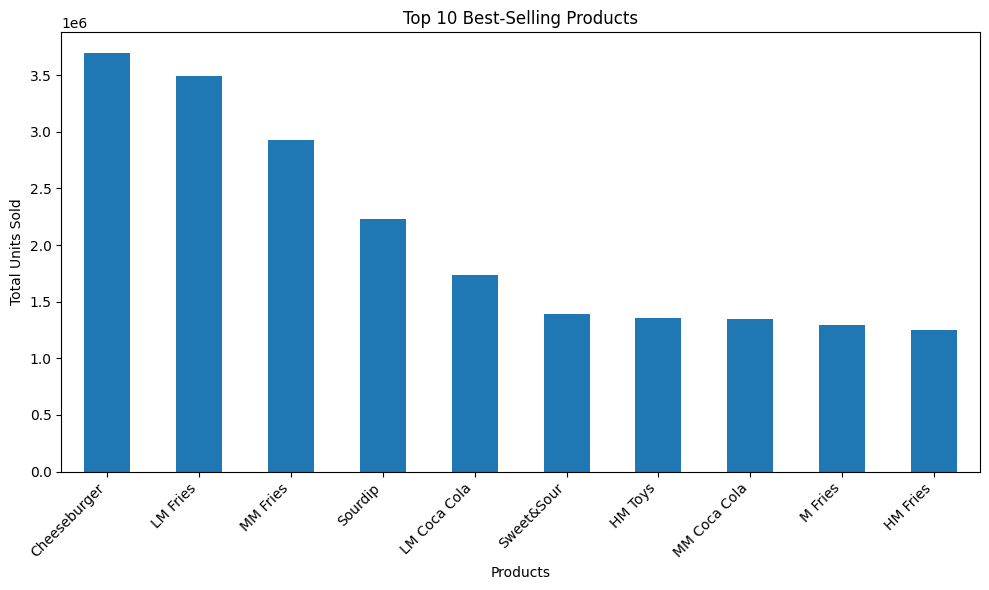

In [16]:
import matplotlib.pyplot as plt

# Plot the top 10 best-selling products
plt.figure(figsize=(10, 6))
best_selling_units.head(10).plot(kind='bar')
plt.title('Top 10 Best-Selling Products')
plt.ylabel('Total Units Sold')
plt.xlabel('Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


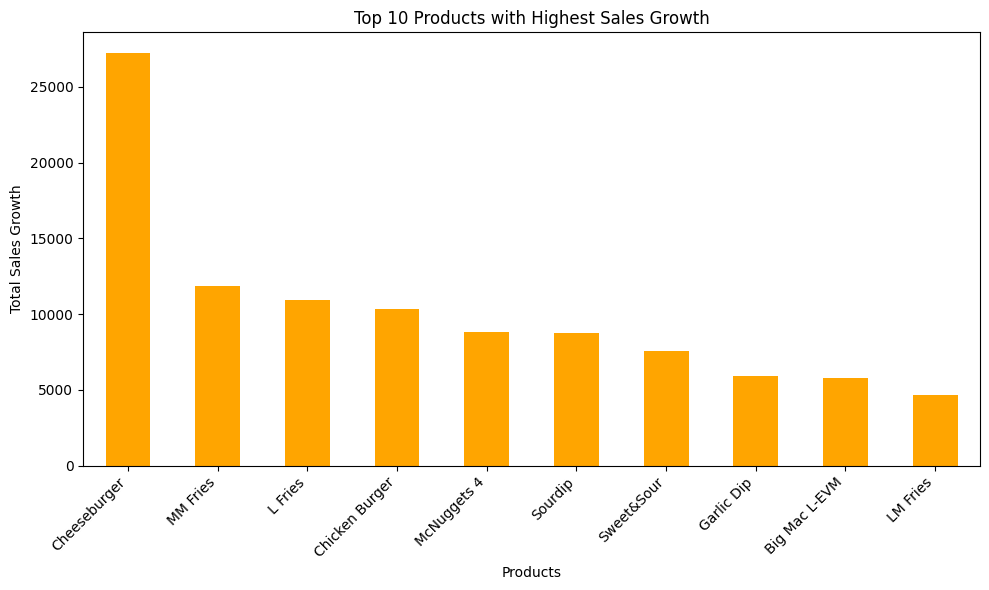

In [17]:
# Plot the top 10 products with the highest sales growth
plt.figure(figsize=(10, 6))
sales_growth.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Products with Highest Sales Growth')
plt.ylabel('Total Sales Growth')
plt.xlabel('Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


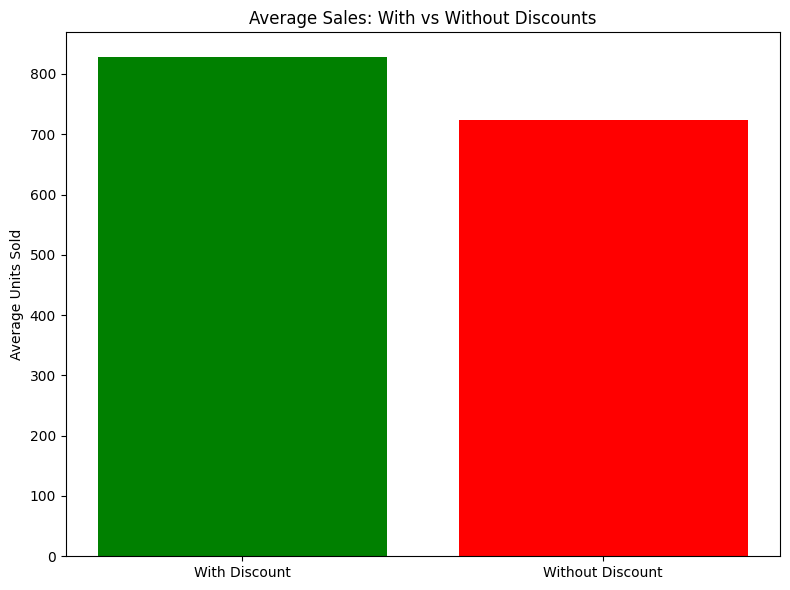

In [18]:
# Plot the average sales with and without discounts
plt.figure(figsize=(8, 6))
plt.bar(['With Discount', 'Without Discount'], [avg_sales_with_discount, avg_sales_without_discount], color=['green', 'red'])
plt.title('Average Sales: With vs Without Discounts')
plt.ylabel('Average Units Sold')
plt.tight_layout()
plt.show()


 2.	Describe the correlation of POS (Point of Sale) data.

In [14]:
import pandas as pd

# Load the cleaned data
cleaned_product_mix_df = pd.read_csv('Cleaned_Product_mix.csv')
cleaned_discount_df = pd.read_csv('Cleaned_Discount.csv')

# Merge the sales data with discount data to have all relevant information in one dataframe
merged_df = pd.merge(cleaned_product_mix_df, cleaned_discount_df, on=['Year', 'Week of Year - Monday - Sunday', 'Country', 'Sold Menu Item', 'Code', 'Local POS Area'], how='left')

# Fill any missing discounts with 0
merged_df['Discount (TDA)'].fillna(0, inplace=True)

# Step 1: Aggregate data by POS location
pos_agg = merged_df.groupby('Local POS Area').agg({
    'Units Sold (TDA)': 'sum',
    'Net Sales (TDA)': 'sum',
    'Discount (TDA)': 'sum'
}).reset_index()

# Step 2: Drop the non-numeric 'Local POS Area' column before correlation
pos_correlation = pos_agg.drop(columns=['Local POS Area']).corr()

print("Correlation Matrix for POS Data:")
print(pos_correlation)

# Additional descriptive statistics by POS location
print("\nDescriptive Statistics by POS Location:")
print(pos_agg)


Correlation Matrix for POS Data:
                  Units Sold (TDA)  Net Sales (TDA)  Discount (TDA)
Units Sold (TDA)          1.000000         0.997368        0.928272
Net Sales (TDA)           0.997368         1.000000        0.905023
Discount (TDA)            0.928272         0.905023        1.000000

Descriptive Statistics by POS Location:
               Local POS Area  Units Sold (TDA)  Net Sales (TDA)  \
0  Cold-dessert 1 (w/ drinks)             24008     2.181262e+04   
1                    Delivery           8778736     1.032928e+07   
2                  Drive Thru          19105326     2.014252e+07   
3               Front Counter           9704398     9.032632e+06   
4                      McCafe            694292     5.120318e+05   
5            Self Order Kiosk          27685096     2.788554e+07   

   Discount (TDA)  
0    3.237919e+03  
1    1.670000e+00  
2    1.356091e+06  
3    8.976354e+05  
4    2.082081e+04  
5    1.707509e+06  


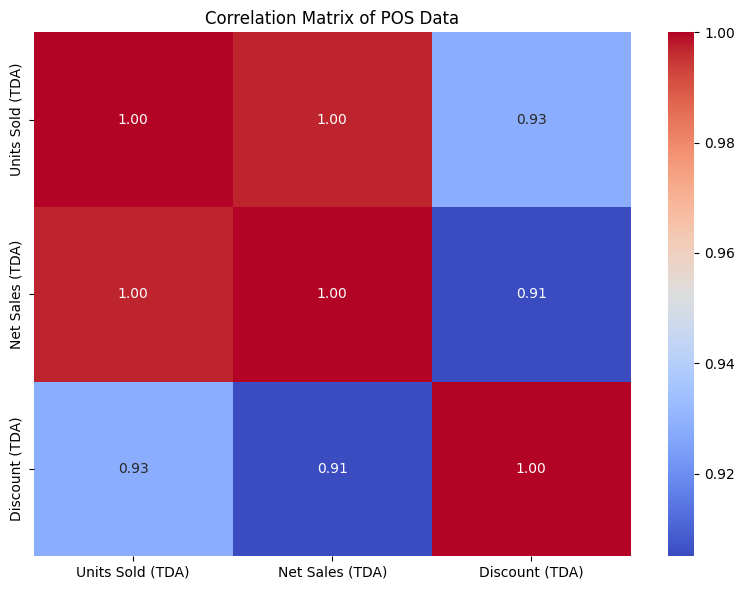

In [19]:
import seaborn as sns

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pos_correlation, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of POS Data')
plt.tight_layout()
plt.show()


3.	Determine and describe which product sales increases contribute the most to the overall revenue growth.

In [15]:
import pandas as pd

# Load the cleaned data
cleaned_product_mix_df = pd.read_csv('Cleaned_Product_mix.csv')

# Step 1: Calculate Week-over-Week Revenue Growth
# Sort the data by product and week to ensure proper calculation of week-over-week changes
cleaned_product_mix_df = cleaned_product_mix_df.sort_values(by=['Sold Menu Item', 'Week of Year - Monday - Sunday'])

# Calculate week-over-week revenue change for each product
cleaned_product_mix_df['Previous Week Revenue'] = cleaned_product_mix_df.groupby('Sold Menu Item')['Net Sales (TDA)'].shift(1)
cleaned_product_mix_df['Revenue Growth'] = cleaned_product_mix_df['Net Sales (TDA)'] - cleaned_product_mix_df['Previous Week Revenue']

# Fill any NaN values resulting from the shift with 0 (typically the first week would have NaN)
cleaned_product_mix_df['Revenue Growth'].fillna(0, inplace=True)

# Step 2: Calculate the Contribution of Each Product to Overall Revenue Growth
# Calculate the total revenue growth for each product
product_revenue_growth = cleaned_product_mix_df.groupby('Sold Menu Item')['Revenue Growth'].sum().reset_index()

# Calculate the overall revenue growth
total_revenue_growth = product_revenue_growth['Revenue Growth'].sum()

# Calculate the contribution percentage of each product to the overall revenue growth
product_revenue_growth['Contribution to Total Growth (%)'] = (product_revenue_growth['Revenue Growth'] / total_revenue_growth) * 100

# Sort the products by their contribution to overall revenue growth
product_revenue_growth = product_revenue_growth.sort_values(by='Contribution to Total Growth (%)', ascending=False)

# Step 3: Identify the Top Contributors
print("Products Contributing the Most to Overall Revenue Growth:")
print(product_revenue_growth.head(10))  # Display the top 10 products

# Save the results for further review if needed
product_revenue_growth.to_csv('Product_Revenue_Contribution.csv', index=False)


Products Contributing the Most to Overall Revenue Growth:
                            Sold Menu Item  Revenue Growth  \
123                           Cheeseburger     18455.32725   
44                           Big Mac L-EVM     18076.43265   
302                                L Fries     13163.94540   
199      DeLuxe Chicken burger medium meal      9829.85100   
193         DeLuxe Beef burger medium meal      9604.28520   
203  Deep fried cheese Maestro  large meal      8317.44750   
35                                 Big Mac      8123.76285   
130                         Chicken Burger      7768.99140   
417                            McNuggets 4      7321.36545   
137                       Chicken Wrap EVM      5507.29305   

     Contribution to Total Growth (%)  
123                         99.400477  
44                          97.359749  
302                         70.901070  
199                         52.943623  
193                         51.728724  
203                

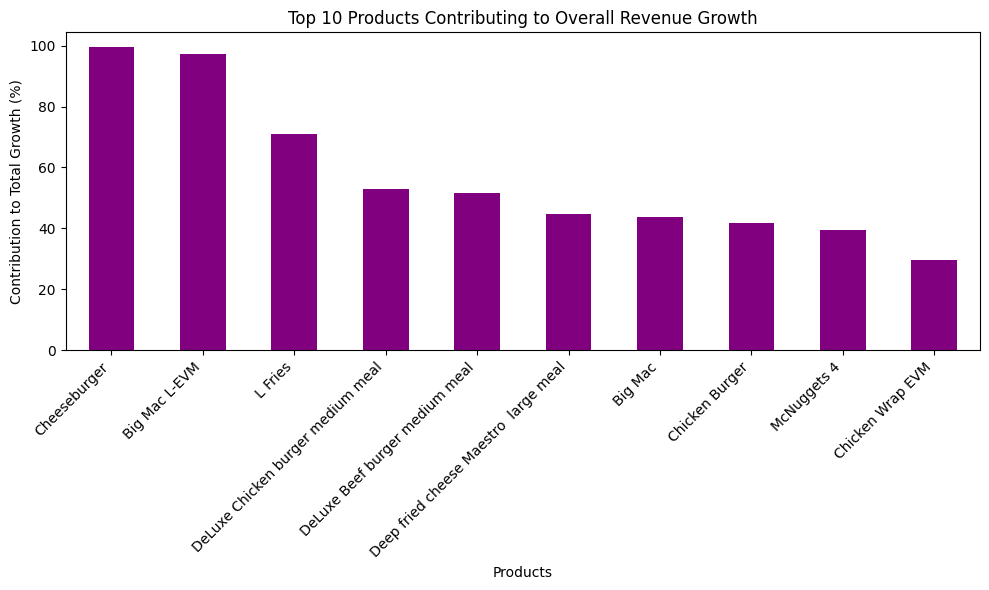

In [20]:
# Plot the top 10 products contributing the most to overall revenue growth
plt.figure(figsize=(10, 6))
product_revenue_growth.head(10).set_index('Sold Menu Item')['Contribution to Total Growth (%)'].plot(kind='bar', color='purple')
plt.title('Top 10 Products Contributing to Overall Revenue Growth')
plt.ylabel('Contribution to Total Growth (%)')
plt.xlabel('Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [21]:
# Task 1 Data
print("Descriptive Statistics:")
print(descriptive_stats)

print("\nBest-Selling Units:")
print(best_selling_units.head(10))

print("\nProducts with the Highest Sales Growth:")
print(sales_growth.head(10))

print("\nCorrelation between Discounts and Sales Volume:")
print(discount_sales_correlation)

print("\nAverage Sales with Discount: ", avg_sales_with_discount)
print("Average Sales without Discount: ", avg_sales_without_discount)

# Task 2 Data
print("\nCorrelation Matrix for POS Data:")
print(pos_correlation)

# Task 3 Data
print("\nProducts Contributing the Most to Overall Revenue Growth:")
print(product_revenue_growth.head(10))


Descriptive Statistics:
       Net Sales (TDA)  Units Sold (TDA)
count     76348.000000      76348.000000
mean        803.099880        810.370933
std        2261.186915       2283.273343
min           0.000000          2.000000
25%           0.000000         28.000000
50%          47.105400        144.000000
75%         418.855275        632.000000
max       36886.020000      47268.000000

Best-Selling Units:
Sold Menu Item
Cheeseburger    3693130
LM Fries        3493254
MM Fries        2922962
Sourdip         2226974
LM Coca Cola    1738002
Sweet&Sour      1393324
HM Toys         1352412
MM Coca Cola    1342918
M Fries         1297328
HM Fries        1252360
Name: Units Sold (TDA), dtype: int64

Products with the Highest Sales Growth:
Sold Menu Item
Cheeseburger      27246.0
MM Fries          11834.0
L Fries           10940.0
Chicken Burger    10346.0
McNuggets 4        8856.0
Sourdip            8738.0
Sweet&Sour         7584.0
Garlic Dip         5934.0
Big Mac L-EVM      5788.0
LM F

Task 4.	Identify and describe which products have correlated sales.

Highly Correlated Product Pairs:
                                                                     Correlation
Product_1                     Product_2                                         
Forestbery pies Morning Offer Triple Cheesburger                        1.000000
Black Socks                   Yellow Socks                              1.000000
APP44- 2xLEVM + HM            McFlurry  Maltesers  ar karameli          1.000000
                              Donut with Custart Cream                  1.000000
Hamburger in coupon           Mobile32 - 2x HAM                         1.000000
...                                                                          ...
Apple-cinnamon Donut in offer Smoky beef burger                         0.700117
Large White Coffe             McRoyal  Bacon                            0.700090
Chicken Mythic                Medium Ridged potatoes in Medium Meal     0.700033
HM Mineral Water Still        Oreo                                      0.70

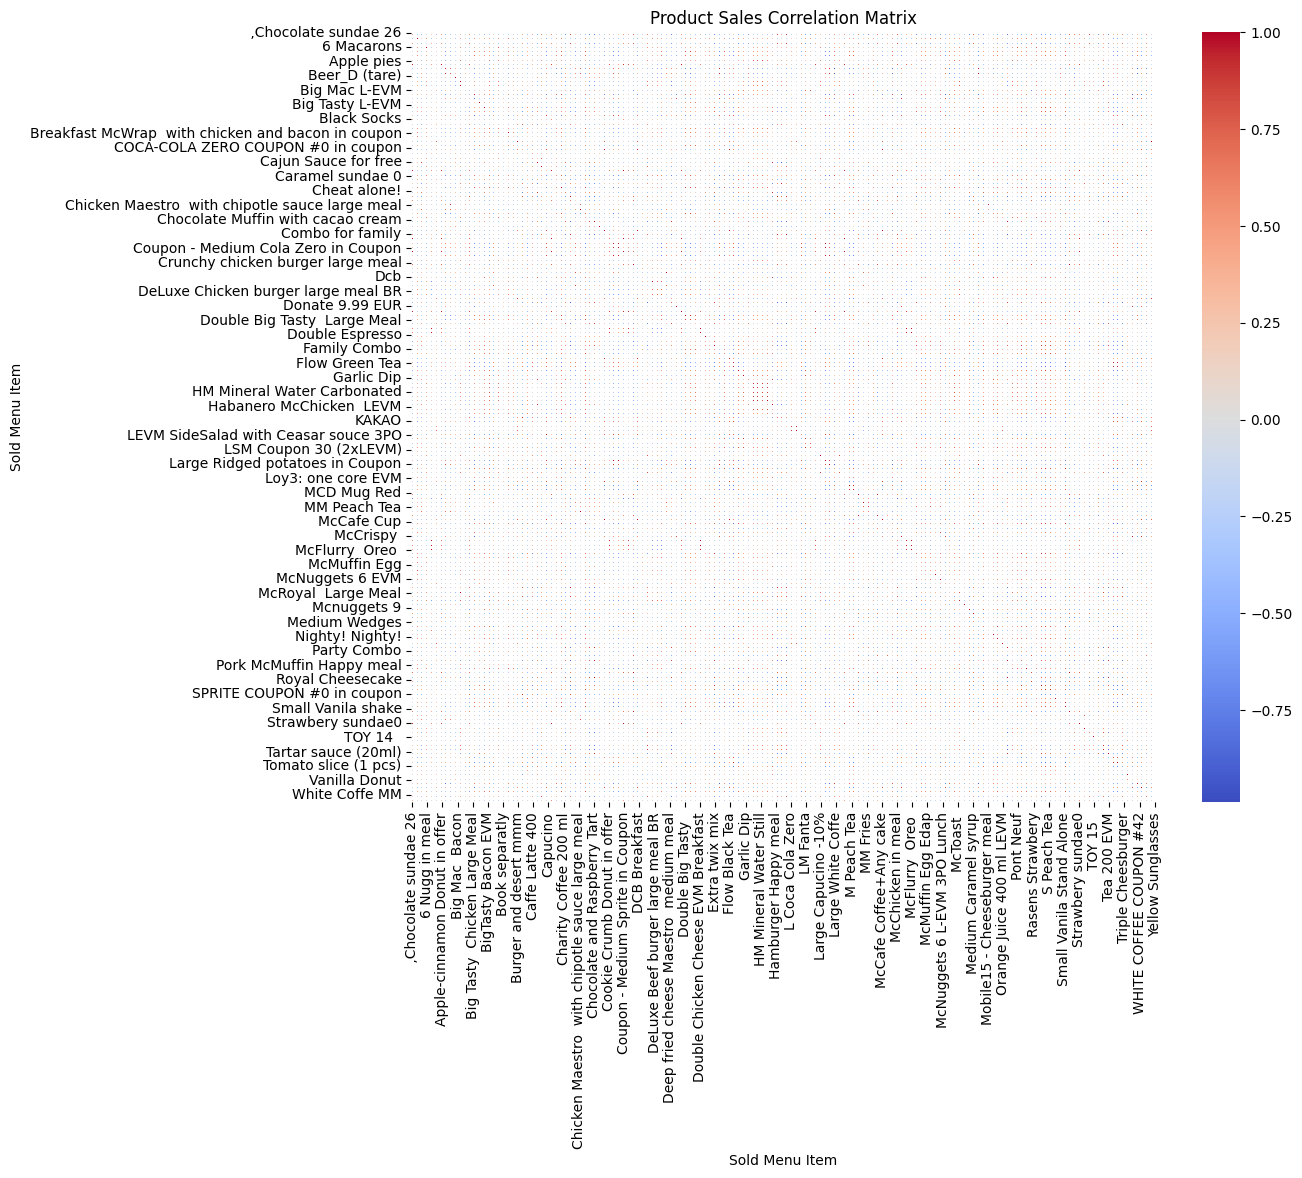

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned data
cleaned_product_mix_df = pd.read_csv('Cleaned_Product_mix.csv')

# Step 1: Prepare the Data
# Pivot the data to create a matrix with weeks as rows and products as columns
sales_pivot = cleaned_product_mix_df.pivot_table(index=['Week of Year - Monday - Sunday'],
                                                 columns='Sold Menu Item',
                                                 values='Units Sold (TDA)',
                                                 aggfunc='sum').fillna(0)

# Step 2: Calculate the Correlation Matrix
correlation_matrix = sales_pivot.corr()

# Step 3: Identify Highly Correlated Products
# Use a mask to filter the upper triangle and self-correlations
mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
corr_matrix_upper = correlation_matrix.where(mask)

# Stack the matrix and convert it to a DataFrame without using reset_index
high_corr_pairs = corr_matrix_upper.stack().to_frame()

# Rename the columns to avoid conflicts
high_corr_pairs.index.names = ['Product_1', 'Product_2']
high_corr_pairs.columns = ['Correlation']

# Filter for correlations greater than 0.7
high_corr_pairs_df = high_corr_pairs[high_corr_pairs['Correlation'] > 0.7].sort_values(by='Correlation', ascending=False)

# Step 4: Visualize and Describe the Correlated Products
# Display the top correlated product pairs
print("Highly Correlated Product Pairs:")
print(high_corr_pairs_df)

# Plot a heatmap of the correlation matrix to visually inspect correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Product Sales Correlation Matrix')
plt.show()

Task 5 5.	Use the file "Products March" and:
•	Calculate changes in sales volumes for the month of March.
•	Determine optimal prices to maximize sales revenue for these products.


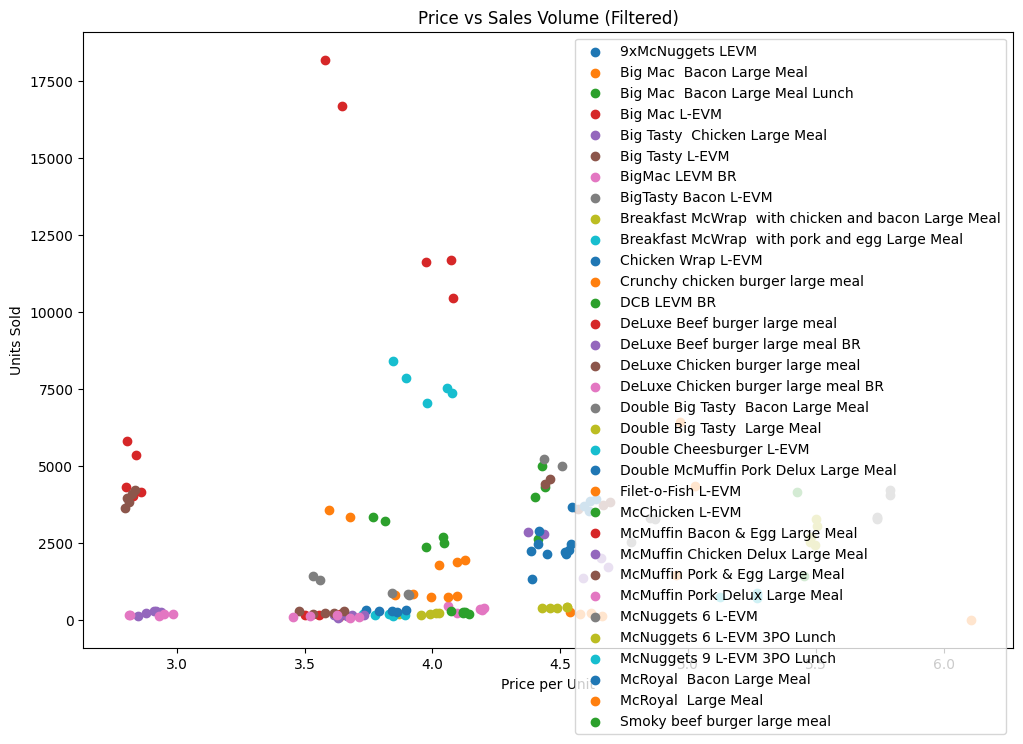

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by product category or another logical grouping
categories = sales_agg['Sold Menu Item'].unique()

# Create separate plots for each category
plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    subset = sales_agg[sales_agg['Sold Menu Item'] == category]
    plt.scatter(subset['Price per Unit'], subset['Units Sold (TDA)'], label=category)

plt.title('Price vs Sales Volume (Filtered)')
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.legend()
plt.show()


In [47]:
import plotly.express as px

# Create an interactive scatter plot using Plotly
fig = px.scatter(sales_agg, x='Price per Unit', y='Units Sold (TDA)',
                 color='Sold Menu Item', size='Units Sold (TDA)',
                 hover_name='Sold Menu Item',
                 labels={'Price per Unit': 'Price per Unit', 'Units Sold (TDA)': 'Units Sold'},
                 title='Interactive Price vs Sales Volume')

fig.update_layout(legend=dict(x=1, y=0.5, traceorder='normal'))
fig.show()


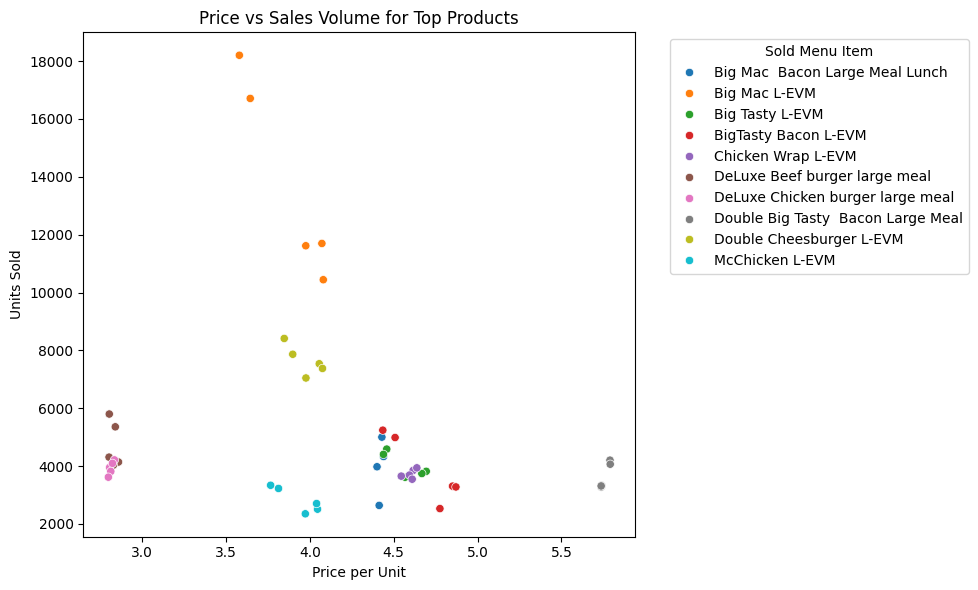

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for top products by total sales volume
top_products = sales_agg.groupby('Sold Menu Item')['Units Sold (TDA)'].sum().nlargest(10).index
top_sales_agg = sales_agg[sales_agg['Sold Menu Item'].isin(top_products)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_sales_agg, x='Price per Unit', y='Units Sold (TDA)', hue='Sold Menu Item', palette='tab10')

plt.title('Price vs Sales Volume for Top Products')
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.legend(title='Sold Menu Item', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Task 6.	Create a machine learning (ML) model to forecast sales volumes:
•	Compare the model's predictions with actual sales volumes in October.
•	Describe the chosen model and provide key conclusions.


<ipython-input-49-53a964a265f5>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-49-53a964a265f5>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Mean Absolute Error (MAE): 425.31674745572036
Root Mean Squared Error (RMSE): 1249.4061696191186


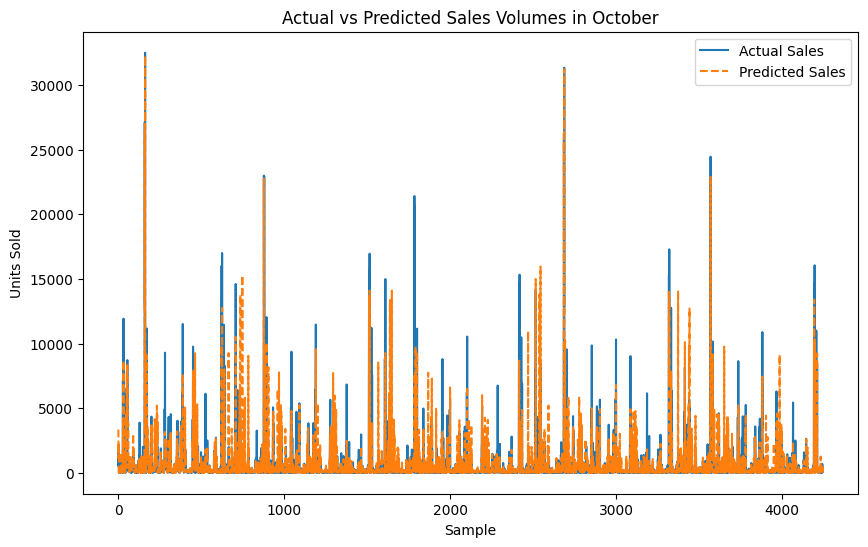

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset (using the merged data from the previous step)
product_mix_df = pd.read_csv('Product_mix.csv')

# Step 1: Filter and Prepare the Data for Modeling
# Assuming 'Week of Year - Monday - Sunday' is a feature, and 'Units Sold (TDA)' is the target
features = ['Week of Year - Monday - Sunday', 'Net Sales (TDA)']  # You can add more features
target = 'Units Sold (TDA)'

# Select data from January to September for training, and use October for testing
train_data = product_mix_df[product_mix_df['Week of Year - Monday - Sunday'].between(1, 39)]  # Weeks 1 to 39 for training
test_data = product_mix_df[product_mix_df['Week of Year - Monday - Sunday'].between(40, 44)]  # Weeks 40 to 44 for testing (October)

# Step 2: Feature Engineering
# Add lagged sales as a feature (e.g., sales from the previous week)
train_data['Lag_1'] = train_data.groupby('Sold Menu Item')['Units Sold (TDA)'].shift(1)
test_data['Lag_1'] = test_data.groupby('Sold Menu Item')['Units Sold (TDA)'].shift(1)

# Drop rows with missing values after adding lag features
train_data = train_data.dropna()
test_data = test_data.dropna()

# Define features and target
X_train = train_data[features + ['Lag_1']]
y_train = train_data[target]
X_test = test_data[features + ['Lag_1']]
y_test = test_data[target]

# Step 3: Model Selection - Using RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Prediction
y_pred = model.predict(X_test)

# Step 6: Evaluation - Compare the model's predictions with actual sales volumes
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting the actual vs predicted sales volumes for October
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales Volumes in October')
plt.xlabel('Sample')
plt.ylabel('Units Sold')
plt.legend()
plt.show()

# Conclusions can be drawn based on the MAE, RMSE, and visual comparison


Mean Absolute Error (MAE): 425.31674745572036
Root Mean Squared Error (RMSE): 1249.4061696191186


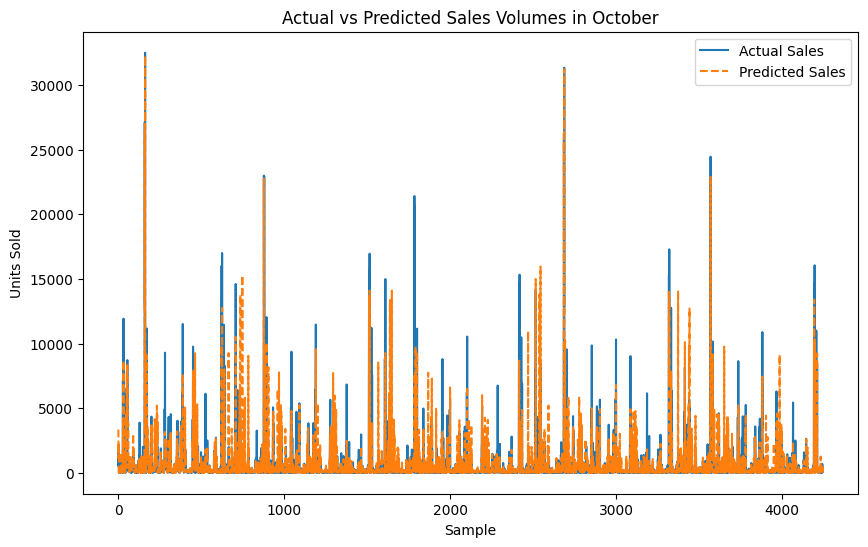

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset (using the merged data from the previous step)
product_mix_df = pd.read_csv('Product_mix.csv')

# Step 1: Filter and Prepare the Data for Modeling
# Assuming 'Week of Year - Monday - Sunday' is a feature, and 'Units Sold (TDA)' is the target
features = ['Week of Year - Monday - Sunday', 'Net Sales (TDA)']  # You can add more features
target = 'Units Sold (TDA)'

# Select data from January to September for training, and use October for testing
train_data = product_mix_df[product_mix_df['Week of Year - Monday - Sunday'].between(1, 39)].copy()  # Weeks 1 to 39 for training
test_data = product_mix_df[product_mix_df['Week of Year - Monday - Sunday'].between(40, 44)].copy()  # Weeks 40 to 44 for testing (October)

# Step 2: Feature Engineering
# Add lagged sales as a feature (e.g., sales from the previous week)
train_data.loc[:, 'Lag_1'] = train_data.groupby('Sold Menu Item')['Units Sold (TDA)'].shift(1)
test_data.loc[:, 'Lag_1'] = test_data.groupby('Sold Menu Item')['Units Sold (TDA)'].shift(1)

# Drop rows with missing values after adding lag features
train_data = train_data.dropna()
test_data = test_data.dropna()

# Define features and target
X_train = train_data[features + ['Lag_1']]
y_train = train_data[target]
X_test = test_data[features + ['Lag_1']]
y_test = test_data[target]

# Step 3: Model Selection - Using RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 4: Model Training
model.fit(X_train, y_train)

# Step 5: Model Prediction
y_pred = model.predict(X_test)

# Step 6: Evaluation - Compare the model's predictions with actual sales volumes
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plotting the actual vs predicted sales volumes for October
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales', linestyle='--')
plt.title('Actual vs Predicted Sales Volumes in October')
plt.xlabel('Sample')
plt.ylabel('Units Sold')
plt.legend()
plt.show()


Comparing it with other Models

                          MAE         RMSE
Linear Regression  531.472877  1412.691413
Random Forest      425.316747  1249.406170
Gradient Boosting  421.030082  1120.891996
XGBoost            434.266842  1328.852921


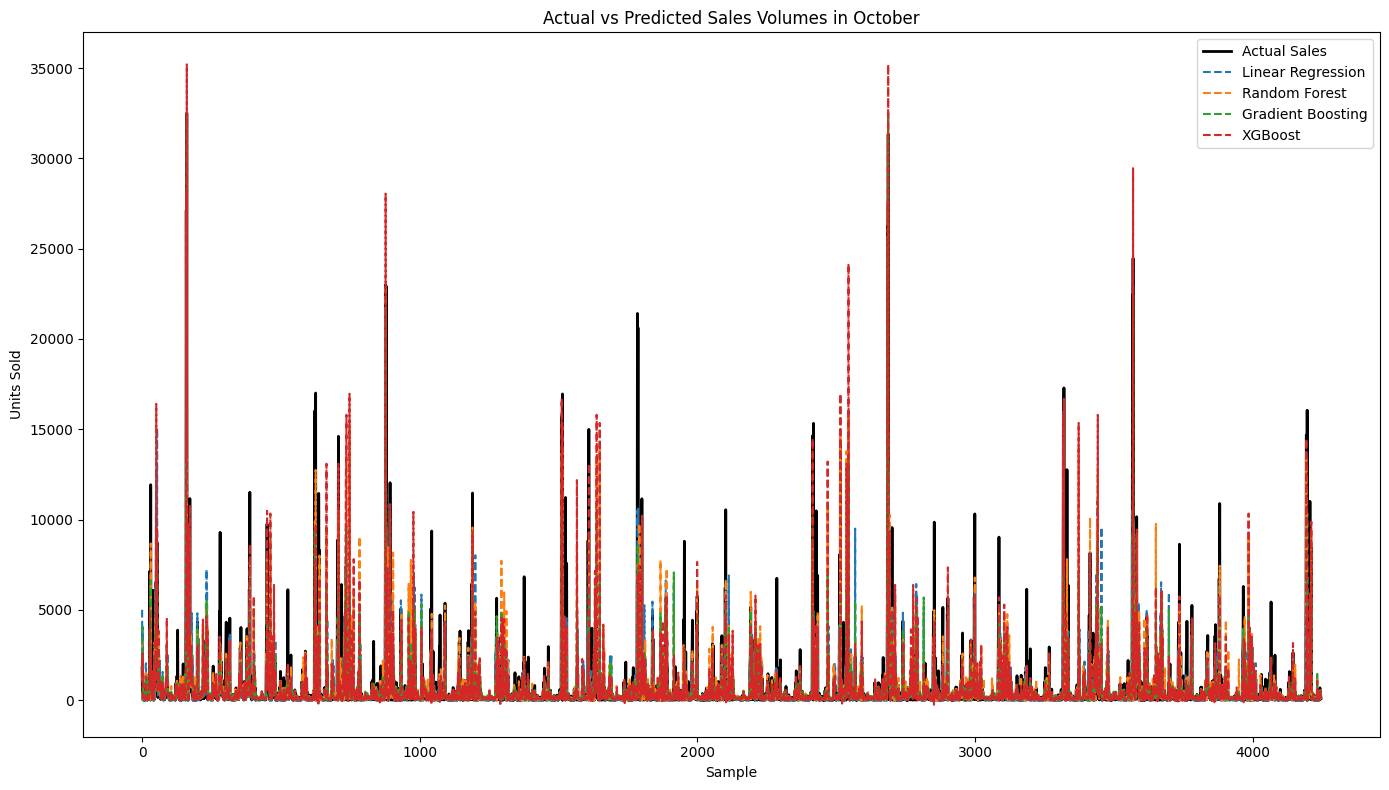

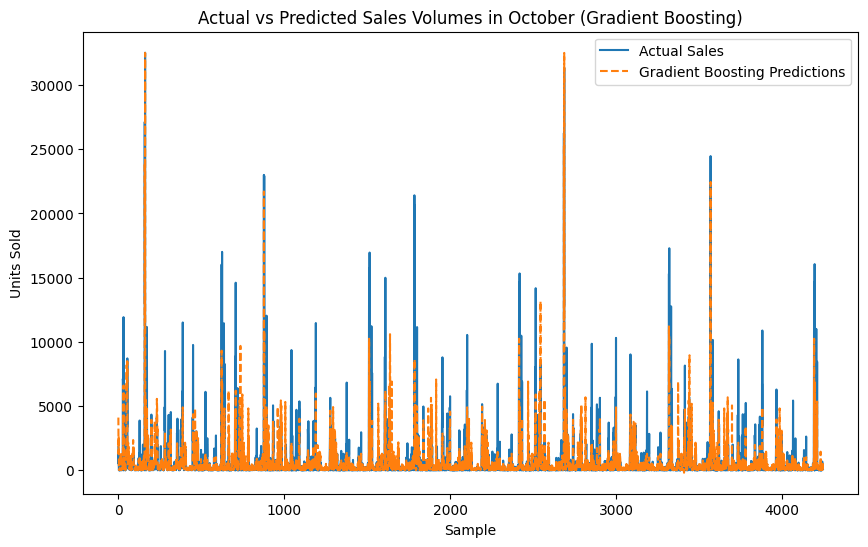

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
product_mix_df = pd.read_csv('Product_mix.csv')

# Prepare the data
features = ['Week of Year - Monday - Sunday', 'Net Sales (TDA)']
target = 'Units Sold (TDA)'

# Select data from January to September for training, and use October for testing
train_data = product_mix_df[product_mix_df['Week of Year - Monday - Sunday'].between(1, 39)].copy()  # Weeks 1 to 39 for training
test_data = product_mix_df[product_mix_df['Week of Year - Monday - Sunday'].between(40, 44)].copy()  # Weeks 40 to 44 for testing (October)

# Feature Engineering
train_data['Lag_1'] = train_data.groupby('Sold Menu Item')['Units Sold (TDA)'].shift(1)
test_data['Lag_1'] = test_data.groupby('Sold Menu Item')['Units Sold (TDA)'].shift(1)

train_data = train_data.dropna()
test_data = test_data.dropna()

X_train = train_data[features + ['Lag_1']]
y_train = train_data[target]
X_test = test_data[features + ['Lag_1']]
y_test = test_data[target]

# Dictionary to store model results and predictions
results = {}
predictions = {}

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
results['Linear Regression'] = {'MAE': mae_linear, 'RMSE': rmse_linear}
predictions['Linear Regression'] = y_pred_linear

# 2. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
results['Random Forest'] = {'MAE': mae_rf, 'RMSE': rmse_rf}
predictions['Random Forest'] = y_pred_rf

# 3. Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
results['Gradient Boosting'] = {'MAE': mae_gb, 'RMSE': rmse_gb}
predictions['Gradient Boosting'] = y_pred_gb

# 4. XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
results['XGBoost'] = {'MAE': mae_xgb, 'RMSE': rmse_xgb}
predictions['XGBoost'] = y_pred_xgb

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

# Visualizing the performance of each model
plt.figure(figsize=(14, 8))

# Plotting the actual sales
plt.plot(y_test.values, label='Actual Sales', color='black', linestyle='-', linewidth=2)

# Plotting the predictions from each model
plt.plot(y_pred_linear, label='Linear Regression', linestyle='--')
plt.plot(y_pred_rf, label='Random Forest', linestyle='--')
plt.plot(y_pred_gb, label='Gradient Boosting', linestyle='--')
plt.plot(y_pred_xgb, label='XGBoost', linestyle='--')

# Adding titles and labels
plt.title('Actual vs Predicted Sales Volumes in October')
plt.xlabel('Sample')
plt.ylabel('Units Sold')
plt.legend()
plt.tight_layout()
plt.show()

# Visual comparison of actual vs predicted sales for the best model
best_model_name = results_df['RMSE'].idxmin()  # Select the model with the lowest RMSE
best_model_predictions = predictions[best_model_name]

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(best_model_predictions, label=f'{best_model_name} Predictions', linestyle='--')
plt.title(f'Actual vs Predicted Sales Volumes in October ({best_model_name})')
plt.xlabel('Sample')
plt.ylabel('Units Sold')
plt.legend()
plt.show()
